Name: Mukesh Aryal

Student No: V00977403

Assignment 02

Phys555

# Question No.: 02
# KNN model for a multiclass classification using MNIST dataset
-> The motivation behind this question is to observe the performance of Principle Component Analysis (PCA) and its effect on the accuracy of the prediction when KNN model is used. 

-> The primary goal of the problem deals with training the model with different value of n_components for PCA while using KNN.

-> The secondary goal of the problem focuses on comparing KNN model against logistic regression. This exercise lets us compare the performance and efficiency of two different models while using them on the same data set to weigh their pros and cons. 


In [1]:
#loading packages
%reset -f
%matplotlib inline
import pandas as pd
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

print('Done!')


Done!


# About MNIST dataset
The MNIST database is a large database of handwritten digits that can be used to train and predict different models; furthermore, it helps us to check the accuracy of model. The dimension of each image of the database is 28x28. The database contains 60,000 training images and 10,000 testing images.

In [2]:
## Getting MNIST data 


##Defining Input and target and normalizing the input



from tensorflow.keras.datasets import mnist

(inp_tr_cl, tar_tr), (inp_va_cl, tar_va) = mnist.load_data()
inp_tr_cl= inp_tr_cl/255.
inp_va_cl= inp_va_cl/255.
inp_tr_cl = np.reshape(inp_tr_cl,(-1,784))
inp_va_cl = np.reshape(inp_va_cl,(-1,784))



print (np.shape(inp_tr_cl),np.shape(inp_va_cl))

(60000, 784) (10000, 784)


In [3]:
print (tar_tr[0:100]) ## Shuffled?  Yes!
print ('--------------------------------')
print (tar_va[0:100]) ## Shuffled?  Yes!

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
--------------------------------
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


<Figure size 432x288 with 0 Axes>

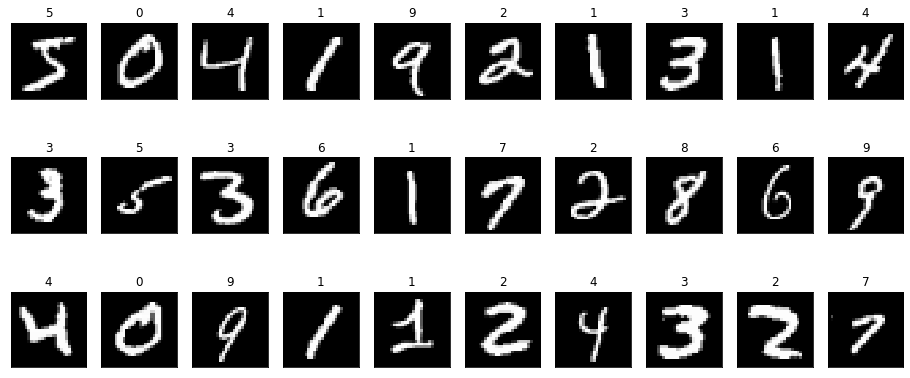

In [4]:
# presenting some digits

n1=0
n2=30
plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(n1,n2):
    ax = fig.add_subplot(3,10,k1+1, title=str(int(tar_tr[k1])))
    ax.matshow(inp_tr_cl[k1].reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# About KNeighborsClassifier
KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

KNN used here is a non-linear model from sklearn. It has different parameters as listed above inside the arguments. The default parameters are used here to keep things simple. The value of a significant hyperparameter n_neighbors is assigned 5. 

# KNN model training and prediction while including all dimensions of data i.e. no PCA is used. 

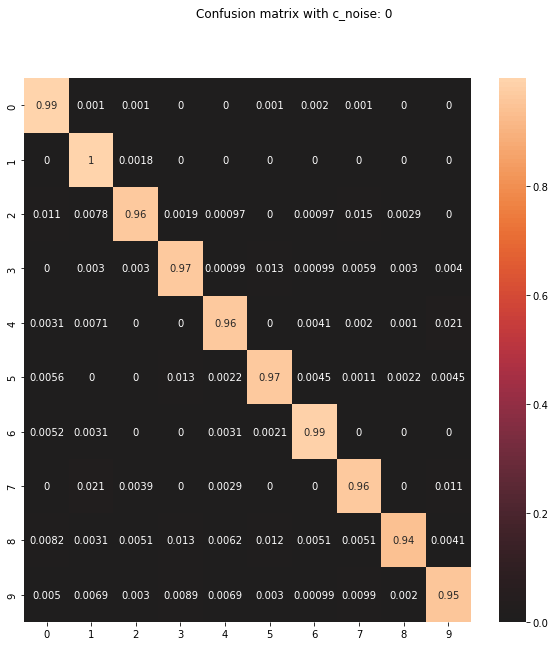

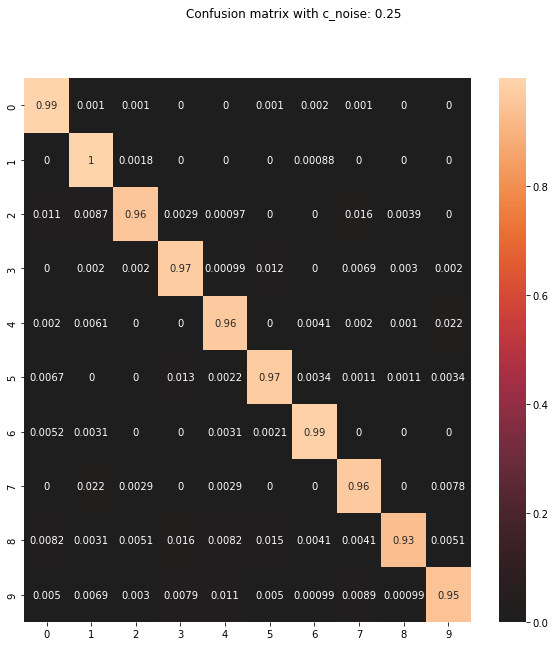

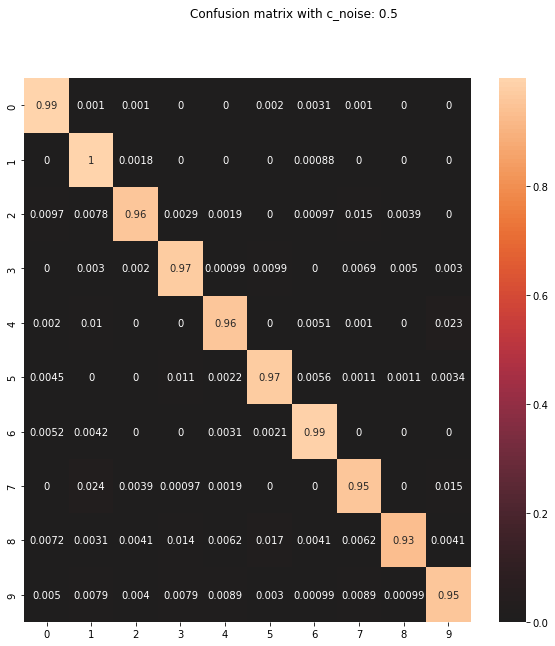

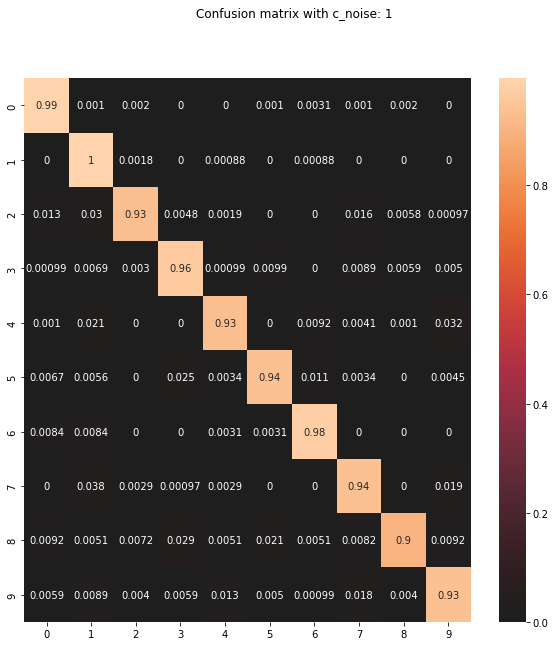

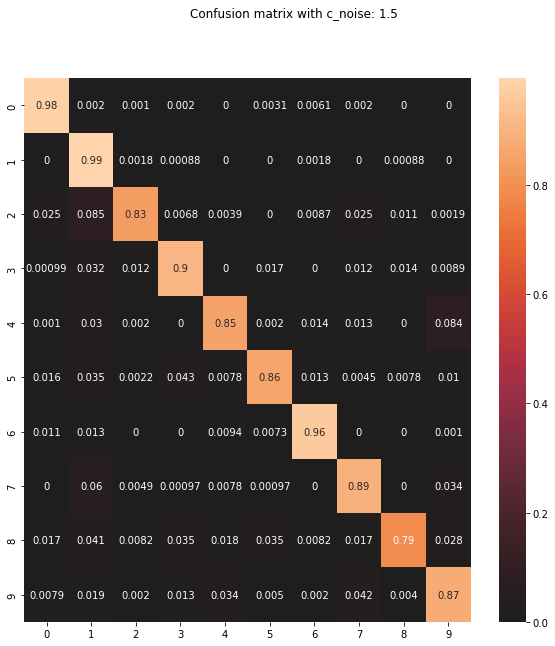

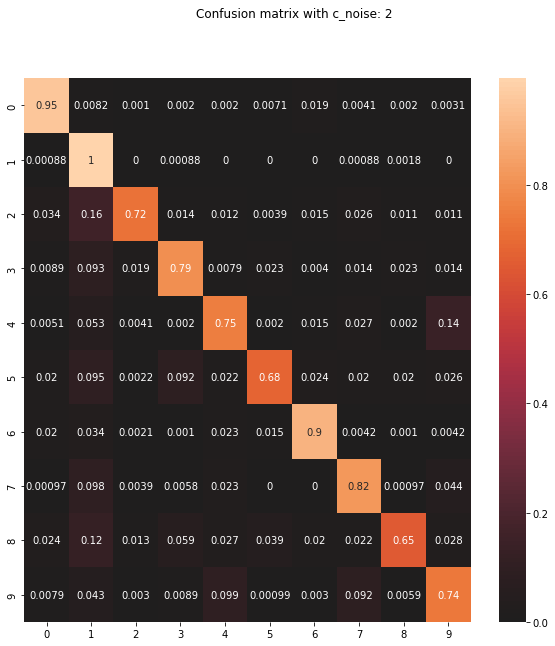

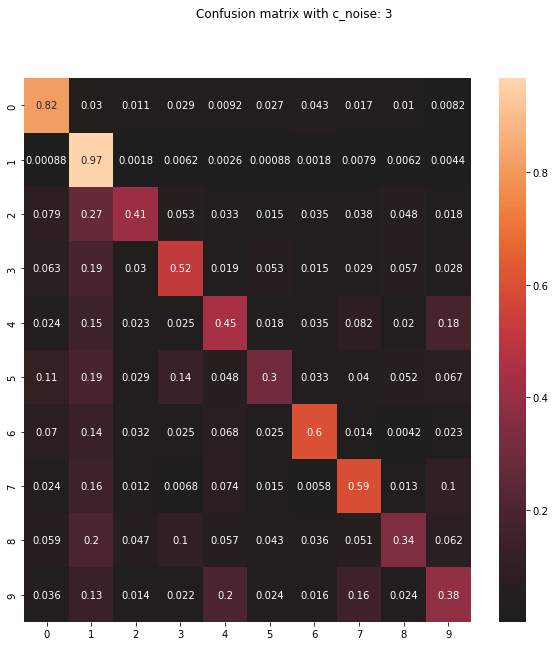

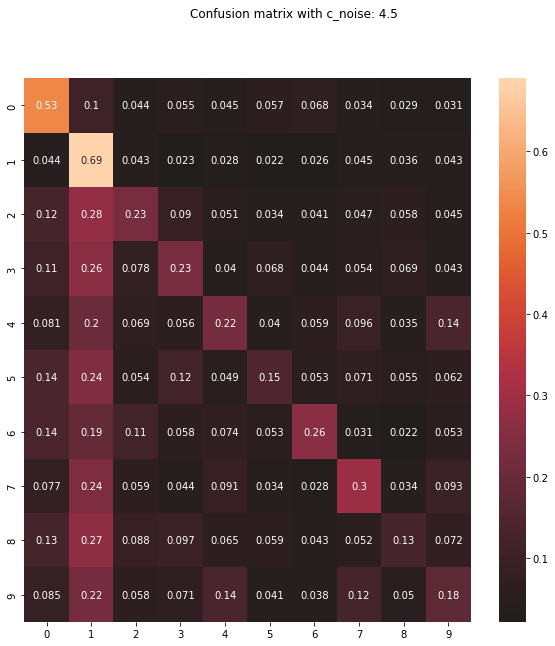

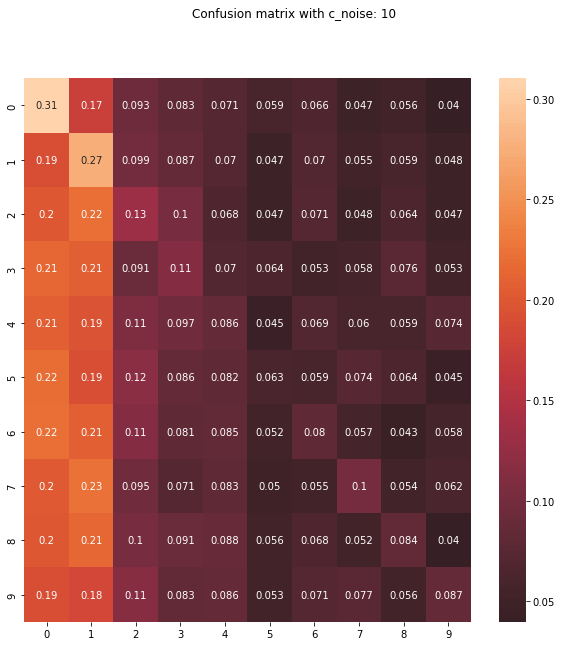

In [6]:
# No PCA

# n_noise = [0,0.25,0.5,1,1.5,2,3,4.5,10,20,30,40,50]

n_noise = [0,0.25,0.5,1,1.5,2,3,4.5,10]
accuracy_no_pca = []
n_val = 5

for c_noise in n_noise:    
    # adding noise 
    #added line
    noise_tr = np.random.rand(60000,784)*c_noise
    noise_va = np.random.rand(10000,784)*c_noise

    inp_tr = (inp_tr_cl+noise_tr)/(1+c_noise)
    inp_va = (inp_va_cl+noise_va)/(1+c_noise)
    
    #KNN
    knn= KNeighborsClassifier(n_neighbors=n_val)

    # train the model
    knn.fit(inp_tr,tar_tr)
    pred_va = knn.predict(inp_va)
    fig = plt.figure(figsize=(10,10))
    title = 'Confusion matrix with c_noise: ' + str(c_noise) +' and '+'all components'
    fig.suptitle(title)
    h=sns.heatmap(confusion_matrix(tar_va,pred_va,normalize='true'),annot = True, center = 0)
    accu = metrics.accuracy_score(pred_va,tar_va)
    accuracy_no_pca.append(accu)


# Observation
The heat map for better visualization of confusion matrix. The x-axis represents the actual classes and y-axis represents the predicted classes. As we increase the noise the prediction gets bad to worst as expected. Further result regarding the accuracy of the model with different level of noises will be demonstrated at the of notebook. 

# Using PCA with n_components = 20

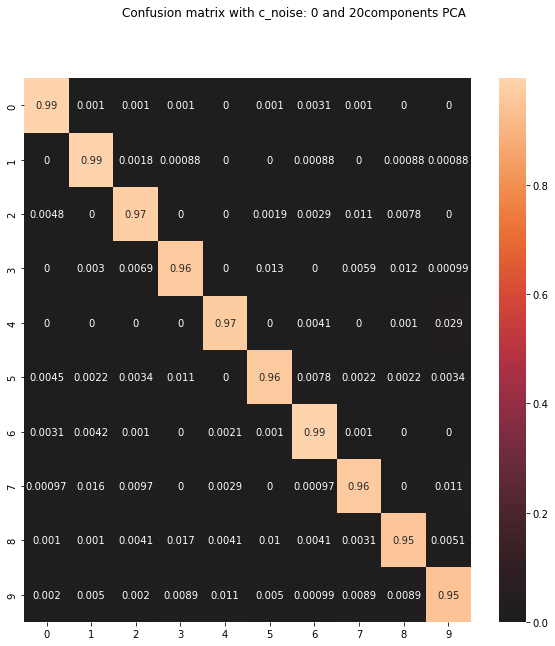

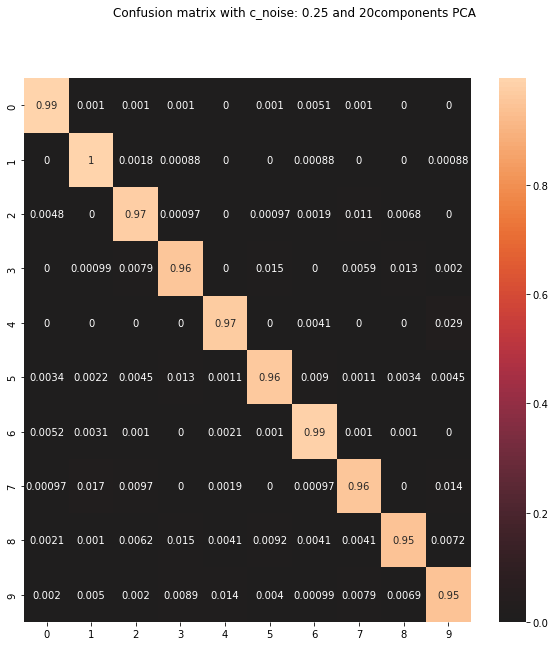

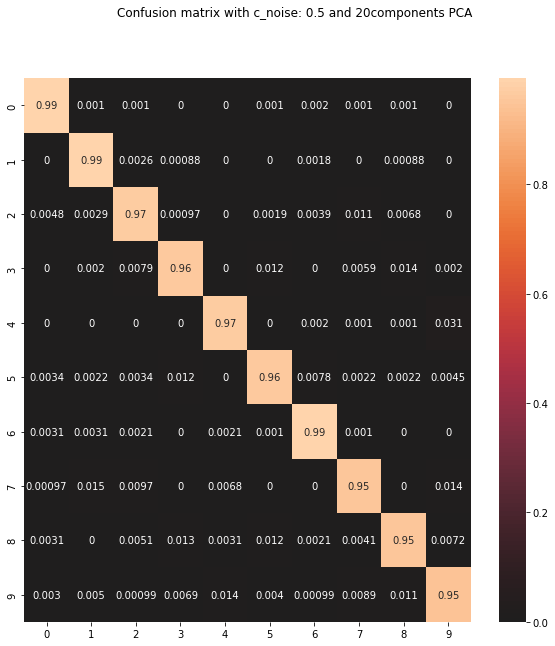

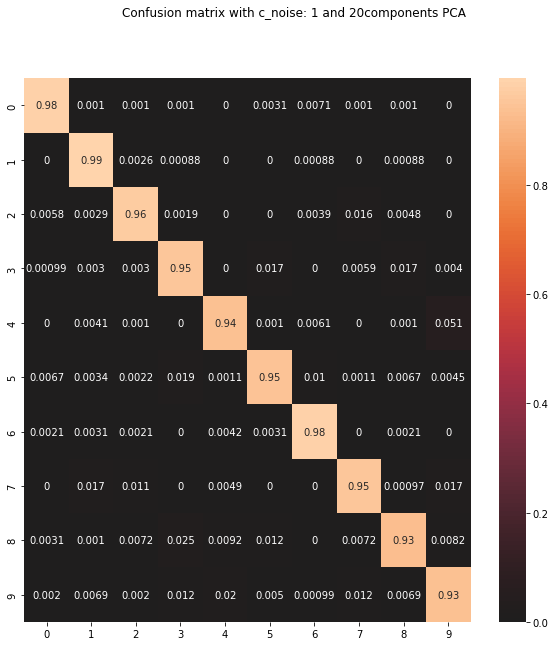

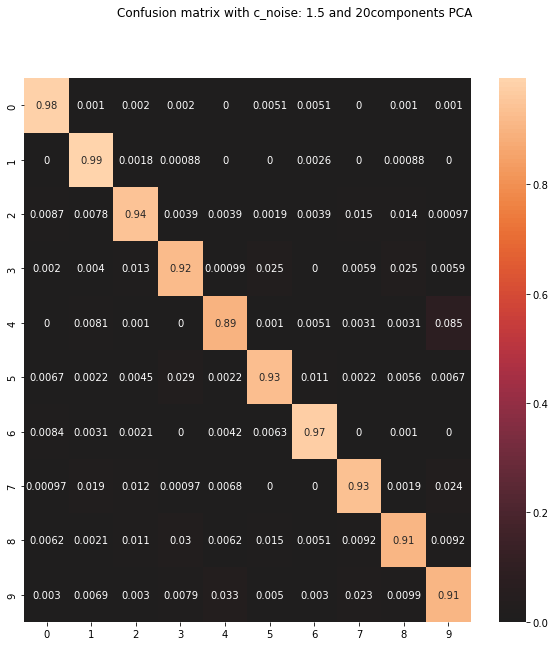

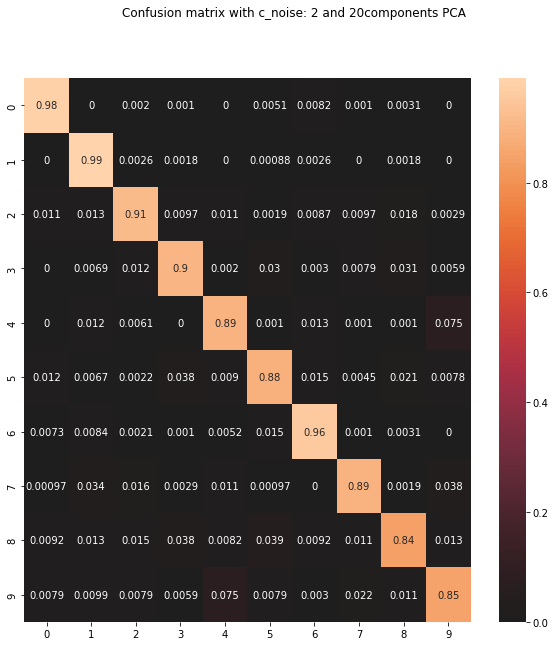

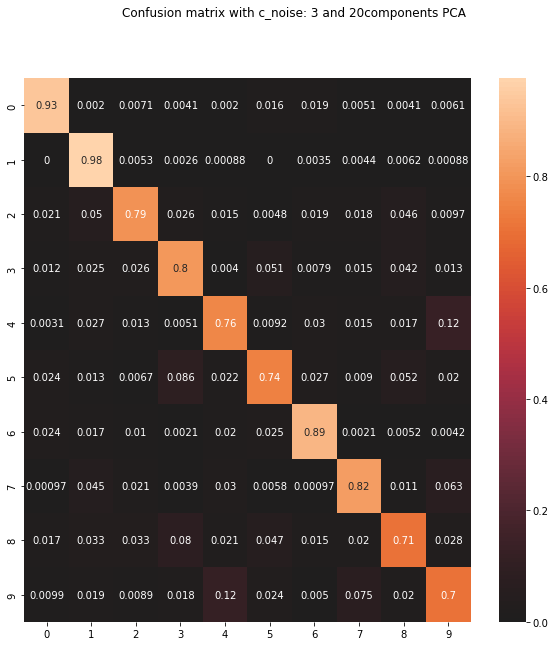

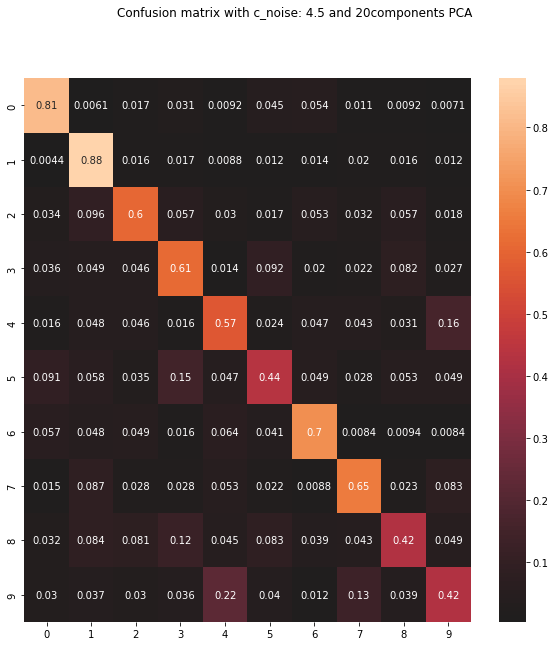

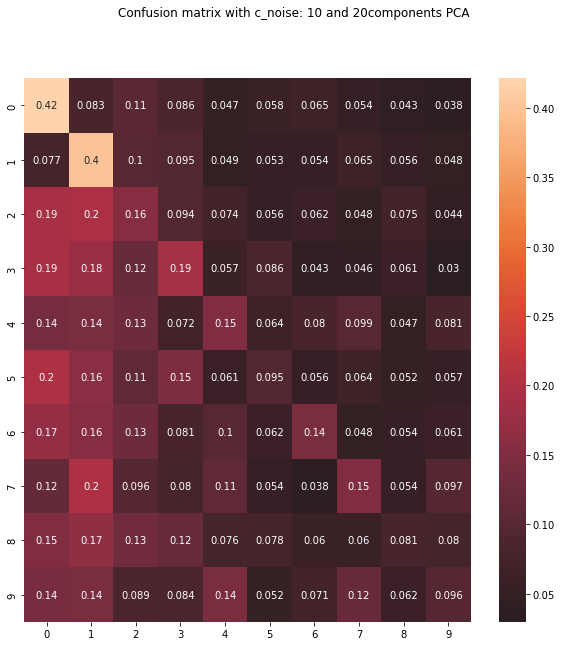

In [8]:
# using PCA for pca_val = 20

accuracy_pca_20 = []
pca_val = 20

for c_noise in n_noise:    
    # adding noise 
    #added line
    noise_tr = np.random.rand(60000,784)*c_noise
    noise_va = np.random.rand(10000,784)*c_noise

    inp_tr = (inp_tr_cl+noise_tr)/(1+c_noise)
    inp_va = (inp_va_cl+noise_va)/(1+c_noise)
    
    # PCA      
    pca = PCA(n_components = pca_val)
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    #KNN
    knn= KNeighborsClassifier(n_neighbors=n_val)

    # train the model
    knn.fit(inp_tr_pca,tar_tr)
    pred_va = knn.predict(inp_va_pca)
#     print()
#     print('The confusion matrix with c_noise ', c_noise,':','\n')
    #print(confusion_matrix(tar_va,pred_va,normalize='true'))
    fig = plt.figure(figsize=(10,10))
    title = 'Confusion matrix with c_noise: ' + str(c_noise) + ' and ' + str(pca_val) + ' components PCA'
    fig.suptitle(title)
    sns.heatmap(confusion_matrix(tar_va,pred_va,normalize='true'),annot = True, center = 0)
    accu = metrics.accuracy_score(pred_va,tar_va)
    accuracy_pca_20.append(accu)


# Observation
The heat map for better visualization of confusion matrix. The x-axis represents the actual classes and y-axis represents the predicted classes. As we increase the noise the prediction gets bad to worst as expected. Further result regarding the accuracy of the model with different level of noises will be demonstrated at the of notebook. 

A quick observation from the confusion matrix tells us that the accuracy is not significantly reduced while using 20 component PCA which is a very good thing. 

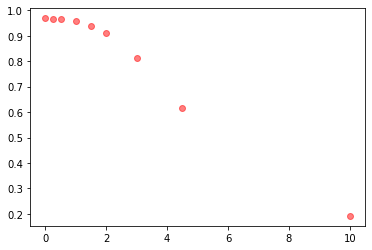

In [9]:
plt.figure()
plt.scatter(n_noise,accuracy_pca_20,c='r',alpha = 0.5)

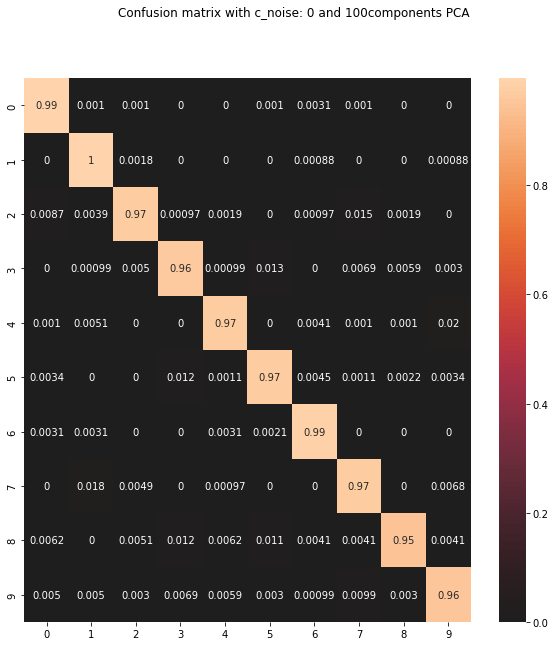

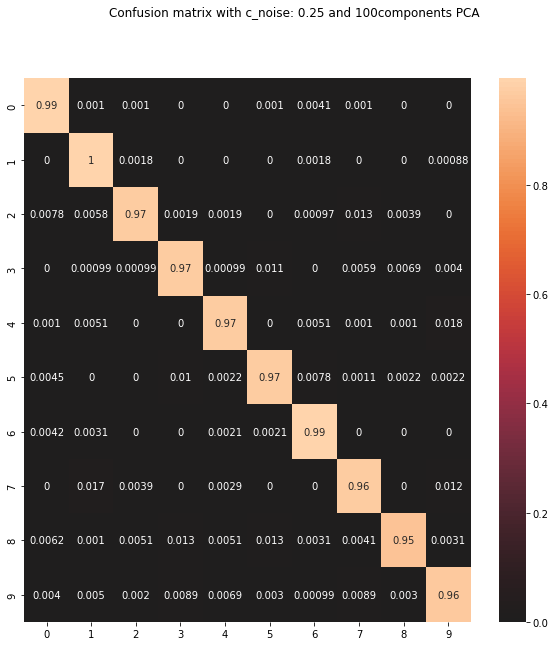

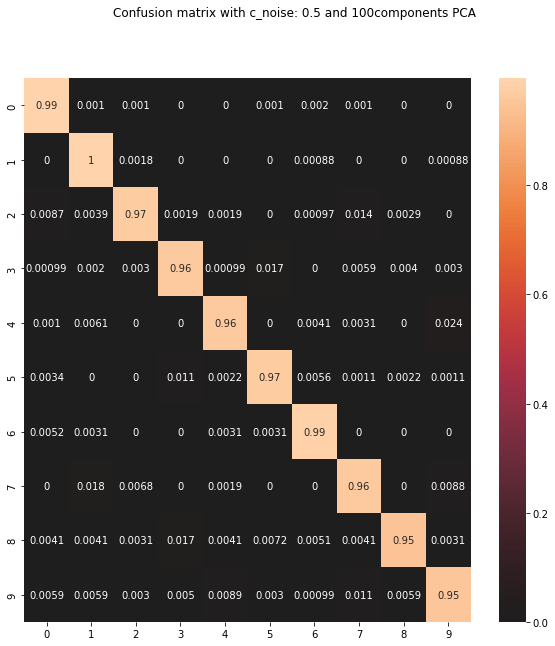

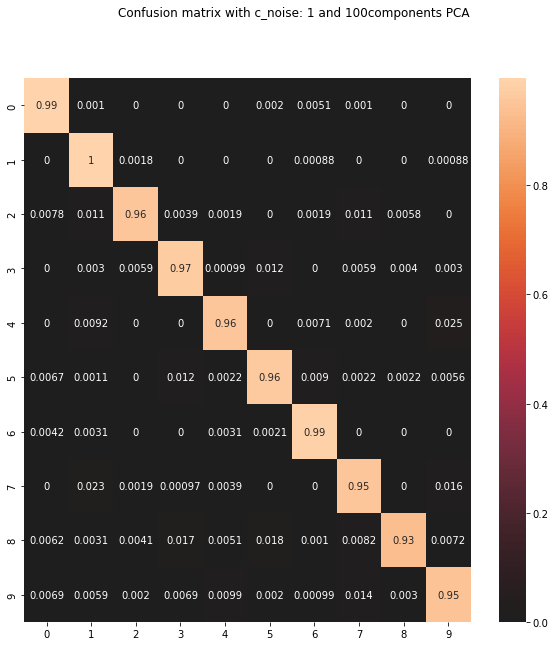

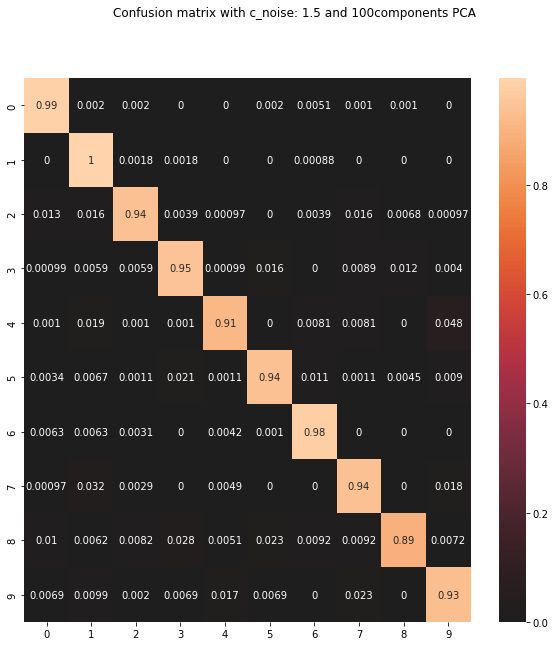

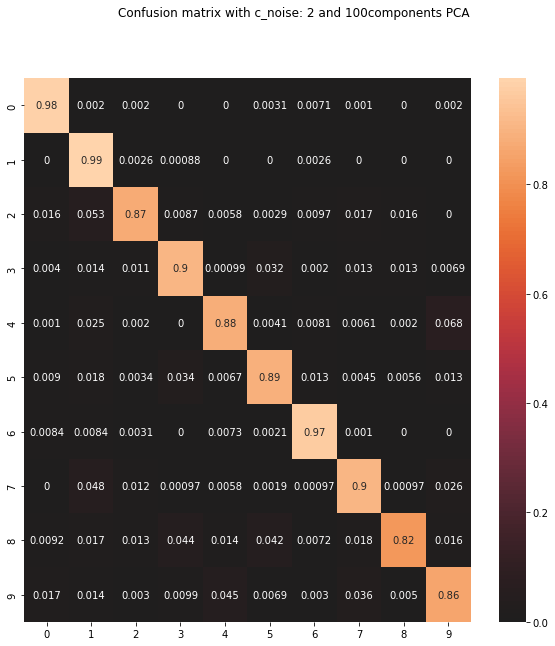

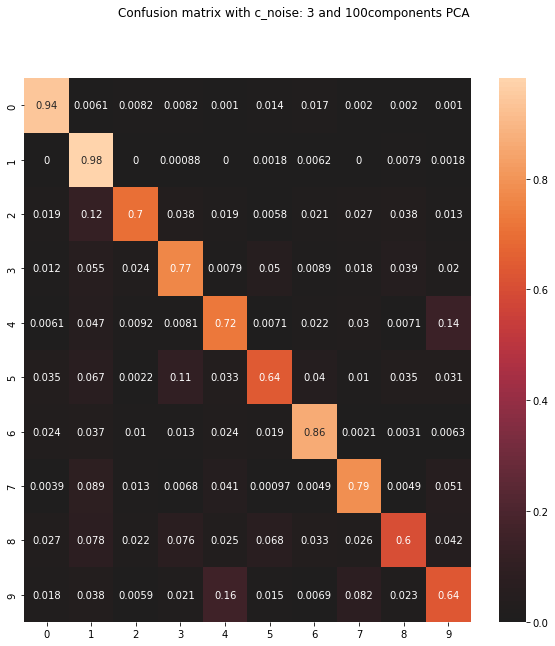

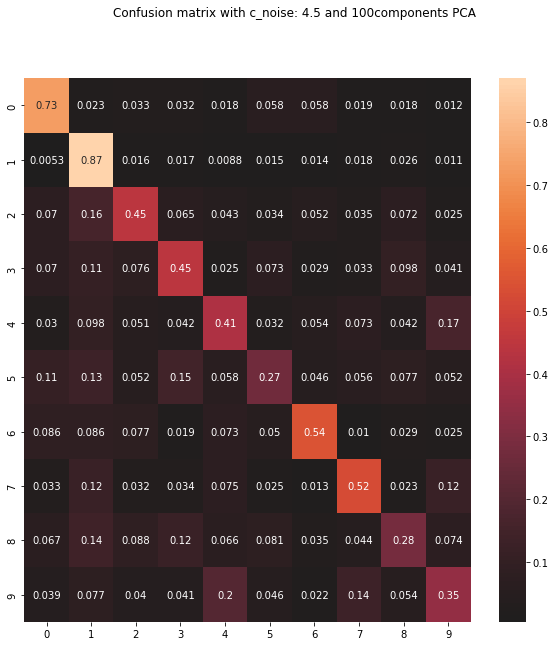

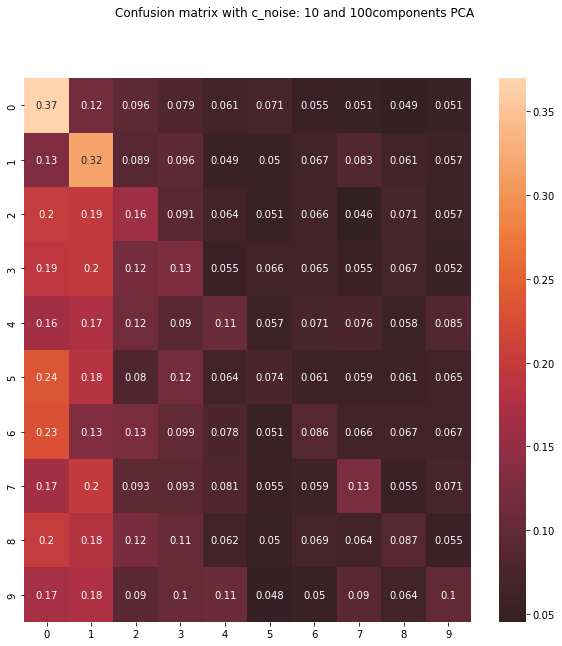

In [11]:
# using PCA for pca_val = 100

accuracy_pca_100 = []
pca_val = 100

for c_noise in n_noise:    
    # adding noise 
    #added line
    noise_tr = np.random.rand(60000,784)*c_noise
    noise_va = np.random.rand(10000,784)*c_noise

    inp_tr = (inp_tr_cl+noise_tr)/(1+c_noise)
    inp_va = (inp_va_cl+noise_va)/(1+c_noise)
    
    # PCA      
    pca = PCA(n_components = pca_val)
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    #KNN
    knn= KNeighborsClassifier(n_neighbors=n_val)

    # train the model
    knn.fit(inp_tr_pca,tar_tr)
    pred_va = knn.predict(inp_va_pca)
#     print()
#     print('The confusion matrix with c_noise ', c_noise,':','\n')
    #print(confusion_matrix(tar_va,pred_va,normalize='true'))
    fig = plt.figure(figsize=(10,10))
    title = 'Confusion matrix with c_noise: ' + str(c_noise) + ' and ' + str(pca_val) +' components PCA'
    fig.suptitle(title)
    sns.heatmap(confusion_matrix(tar_va,pred_va,normalize='true'),annot = True, center = 0)
    accu = metrics.accuracy_score(pred_va,tar_va)
    accuracy_pca_100.append(accu)

# # Observation
The heat map for better visualization of confusion matrix. The x-axis represents the actual classes and y-axis represents the predicted classes. As we increase the noise the prediction gets bad to worst as expected. Further result regarding the accuracy of the model with different level of noises will be demonstrated at the of notebook. 

A quick observation from the confusion matrix tells us that the accuracy is better than 20 component PCA and very close to the model with no PCA at all. 

Text(0, 0.5, 'Accuracy')

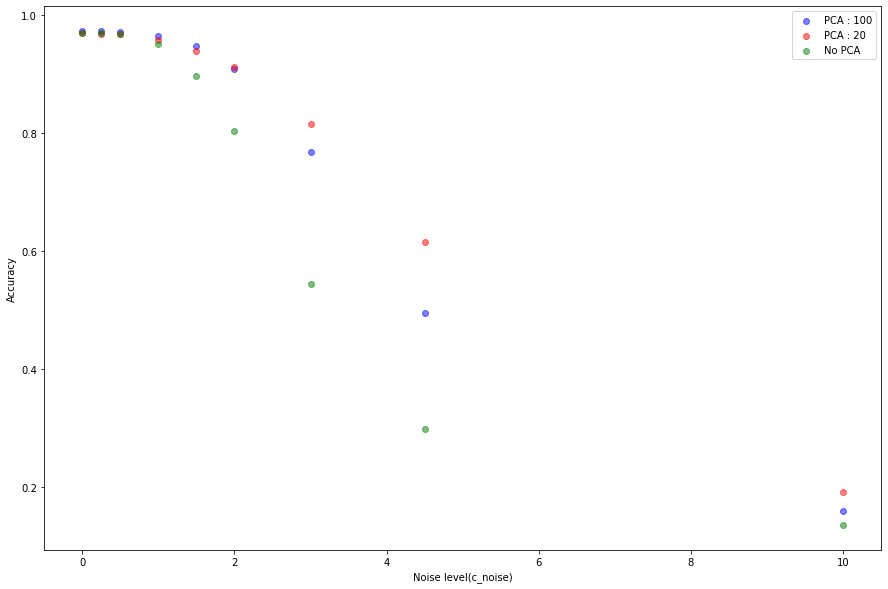

In [13]:
# plots for comparison
fig = plt.figure(figsize=(15,10))
plt.scatter(n_noise,accuracy_pca_100,c='b',alpha = 0.5, label='PCA : 100')
plt.scatter(n_noise,accuracy_pca_20,c='r',alpha = 0.5, label='PCA : 20')
plt.scatter(n_noise,accuracy_no_pca,c='g',alpha = 0.5, label='No PCA')
plt.legend()

plt.xlabel('Noise level(c_noise)')
plt.ylabel('Accuracy')
# fig.scatter(n_noise,accuracy_pca_20)

Text(0, 0.5, 'Accuracy')

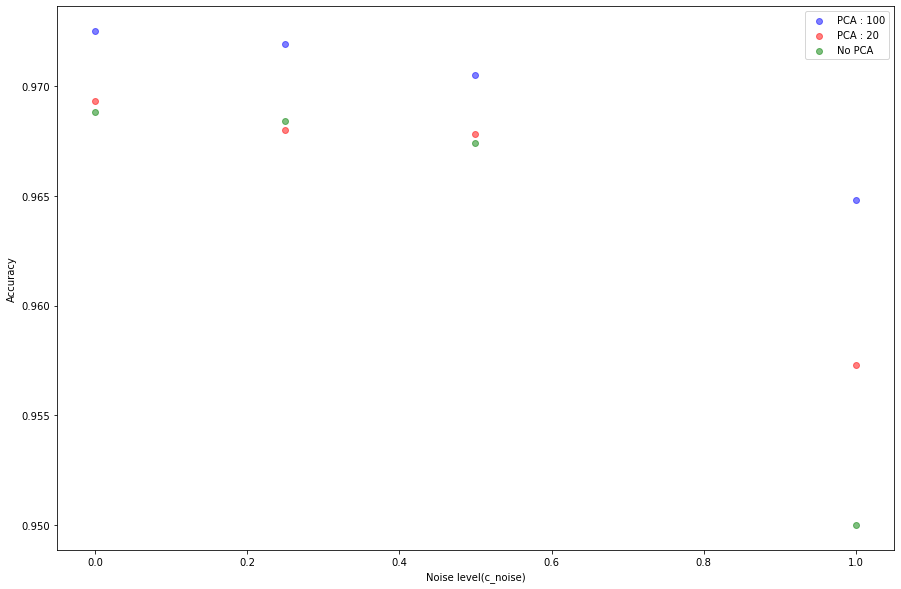

In [14]:
# zooming in on the initial level of noises. 

index = len(n_noise)//2

fig = plt.figure(figsize=(15,10))
plt.scatter(n_noise[0:index],accuracy_pca_100[0:index],c='b',alpha = 0.5, label='PCA : 100')
plt.scatter(n_noise[0:index],accuracy_pca_20[0:index],c='r',alpha = 0.5, label='PCA : 20')
plt.scatter(n_noise[0:index],accuracy_no_pca[0:index],c='g',alpha = 0.5, label='No PCA')
plt.legend()

plt.xlabel('Noise level(c_noise)')
plt.ylabel('Accuracy')

# fig.scatter(n_noise,accuracy_pca_20)

# Comparison and Conclusion:
When comparing the performance of the model and their accuracy. When it comes to accuracy, KNN model seems to outperform the logistic regression. The accuracy of KNN with even 20 components PCA is comparatively higher than the logistic model. The time to train and make prediction, on the other hand, was very slow with KNN. Note: since KNN took a lot of time, I only used c_noise up to 10. The trend is clearly visible and as noise is increased further, the accuracy of all models will drop further. 

Important observation: Even though 100 component PCA model has a higher accuracy initially, the accuracy of the 20 component PCA overtakes the other when the level of noise, i.e. c_noise, is greater than 0.5. Therefore, when it comes to using noisy data set, a lower n_component value for the PCA can be usefull than a higher value. Since, PCA is very good in filtering out noises from data set. When less dimesion is used, more noise is filtered; thus, the accuracy is comparatively higher. 

# Choice
If computational power is significant and the dataset not so big; at such circumstances, KNN would be the better choice and I would further tune the hyperparameter based on the result that I am getting. If the dataset is very large and limited computational power is available, I would probably use the logistic regression model and tune the model further for getting better result. 